<a href="https://colab.research.google.com/github/Gabe-Maja/classification-predict-streamlit-template/blob/master/Team_8_Final_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificasion Predict: Team 8

---
### Problem Statement

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Team 8 is challenged with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. This will be achieved with the steps outlined below:

1. analyse the supplied data;
2. identify potential errors in the data and clean the existing data set;
3. determine if additional features can be added to enrich the data set;
4. build a model that is capable of forecasting the three hourly demand shortfalls;
5. evaluate the accuracy of the best machine learning model;
6. determine what features were most important in the model’s prediction decision, and
7. explain the inner working of the model to a non-technical audience.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling and Model Performance</a>

<a href=#seven>6. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we import and briefly discuss the libraries that will be used throughout the analysis and modelling phases. |

---


In [1]:
# Import the basic libraries 
import nltk
import numpy as np
import pandas as pd

# Language Processing
from nltk.tokenize import TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
!pip install emoji
import emoji
from emoji import emojize
import string
import re


# Vectorisation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# SKLrean models
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# Set plot style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Wordcloud
from PIL import Image
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


     |████████████████████████████████| 170 kB 31.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=a87940dfbc1221f2871f67c5e6403018666e92ba8cd227c775cd615b7168ef11
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


<a id="two"></a>
## 2. Loading the Data
---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section the data is loaded from our Github repository. |

---

In [2]:
# Read in train and test datasets
df_train = pd.read_csv('https://github.com/Gabe-Maja/classification-predict-streamlit-template/blob/master/train.csv?raw=true')

df_test = pd.read_csv('https://github.com/Gabe-Maja/classification-predict-streamlit-template/blob/master/test_with_no_labels.csv?raw=true')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we perform an in-depth analysis of all the variables in the DataFrame. |

---

In [3]:
# Assign new variable for df_train
new_df=df_train

In [4]:
# Count the distribution of sentiments in each class
sentiment_counts = df_train.sentiment.value_counts()
number_of_tweets = df_train.tweetid.count()
print(sentiment_counts)

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64


In [5]:
# look at data statistics for the training dataset
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [6]:
# look at data statistics for test dataset
df_test.describe()

,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [7]:
# Check for null values in train dataset
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [8]:
# Check for null values in test dataset
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

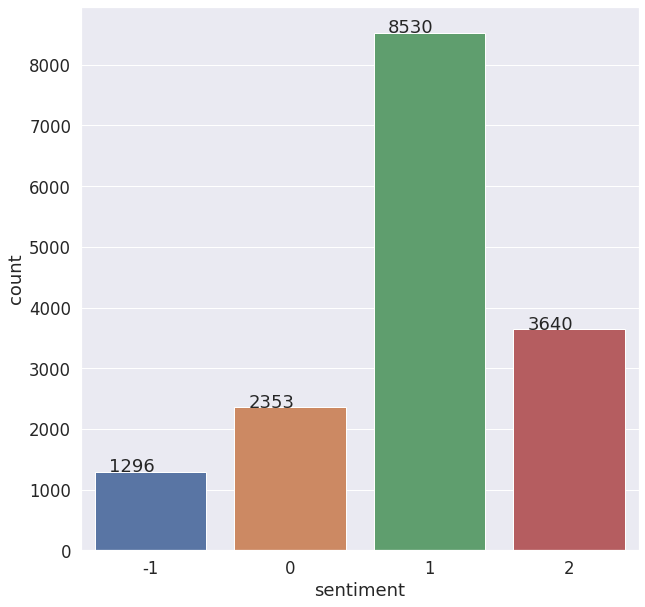

In [9]:
# A visual check of the distribution of the sentiment between the classes
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,10))
graph = sns.countplot(ax=ax1,x='sentiment', data=df_train)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/3., height + 0.1,height ,ha="center")

It is notable that there is an imbalance of classes in the daset and these tend to be a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. This can cause problems as most algorithms are designed to maximize accuracy and reduce error. Given more time, we would have attempted to balance the data in the best way possible through upsampling/downsampling techniques.

In [11]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

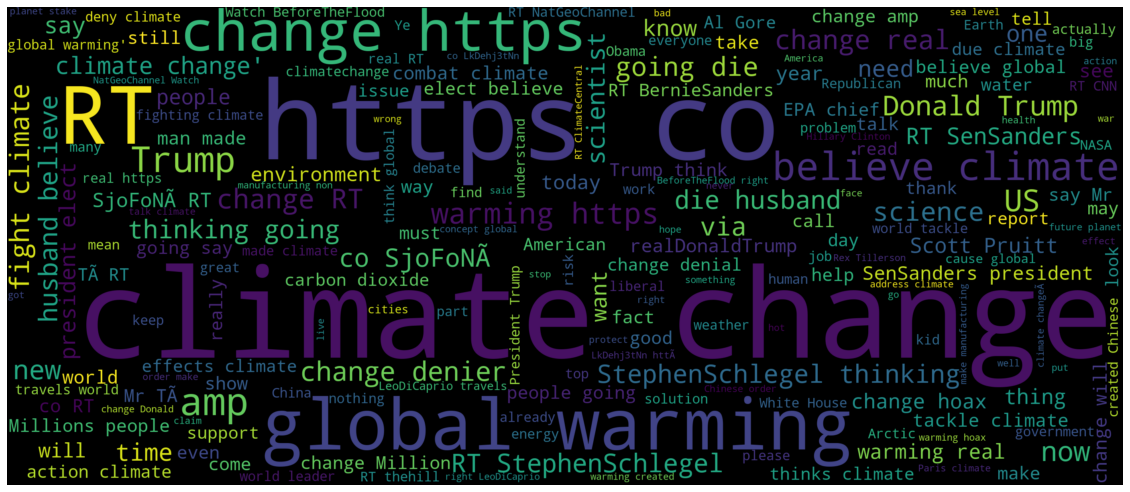

In [12]:
# Most frequent words before cleaning the train set
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
words_train=" ".join([tweet for tweet in df_train['message']])
wordcloud = WordCloud(background_color='black',width=2800, height=1200,random_state=26).generate(words_train)
# Displaying the word cloud image:
# using matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [13]:
df_copy = df_train.copy()
# Labeling the target
df_copy ['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in df_copy['sentiment']]

In [14]:
df_copy.head()

,sentiment,message,tweetid
0,Positive,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Positive,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Positive,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Positive,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


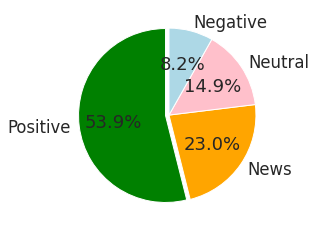

In [15]:
# checking the numerical distribution
values = df_copy['sentiment'].value_counts()/df_copy.shape[0]
labels = (df_copy['sentiment'].value_counts()/df_copy.shape[0]).index
colors = ['green', 'orange', 'pink', 'lightblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

In [16]:
def feature_count(argu):
    sentiment_df = df_copy[df_copy['message'].str.contains(argu)]
    sentiment_df = (sentiment_df.groupby('sentiment').count()/df.groupby('sentiment').count())*100
    sentiment_df['percentage'] = sentiment_df['message']
    sentiment_df = sentiment_df[['percentage']]
    
    return sentiment_df

grouped = df_copy.groupby(df_copy.sentiment)
deny_df = grouped.get_group('Negative')
pro_df = grouped.get_group('Positive')
media_df = grouped.get_group('News')
neutral_df = grouped.get_group('Neutral')

import itertools
import collections
# Create a list of lists containing lowercase words for each tweet
words_in_all_tweet = [tweet.split() for tweet in df_copy['message']]
deny_tweets_list = [deny_tweet.split() for deny_tweet in deny_df['message']]
pro_tweets_list = [pro_tweet.split() for pro_tweet in pro_df['message']]
media_tweets_list = [media_tweet.split() for media_tweet in media_df['message']]
neutral_tweets_list = [neutral_tweet.split() for neutral_tweet in neutral_df['message']]


# List of all words across tweets
clean_message_all_list= list(itertools.chain(*words_in_all_tweet))
clean_message_list_deny= list(itertools.chain(*deny_tweets_list))
clean_message_list_pro= list(itertools.chain(*pro_tweets_list))
clean_message_list_meida= list(itertools.chain(*media_tweets_list))
clean_message_list_neutral= list(itertools.chain(*neutral_tweets_list))

# Create counter
counts_clean_message_all = collections.Counter(clean_message_all_list)
counts_clean_message_deny = collections.Counter(clean_message_list_deny)
counts_clean_message_pro = collections.Counter(clean_message_list_pro)
counts_clean_message_media= collections.Counter(clean_message_list_meida)
counts_clean_message_neutral = collections.Counter(clean_message_list_neutral)

common_words_number = 15
counts_clean_message_all.most_common(common_words_number)
counts_clean_message_deny.most_common(common_words_number)
counts_clean_message_pro.most_common(common_words_number)
counts_clean_message_media.most_common(common_words_number)
counts_clean_message_neutral.most_common(common_words_number)

# Build a Dataframe of the words in the tweets as well as their count
tweet_word_counts_all = pd.DataFrame(counts_clean_message_all.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_deny = pd.DataFrame(counts_clean_message_deny.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_pro = pd.DataFrame(counts_clean_message_pro.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_media = pd.DataFrame(counts_clean_message_media.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_neutral = pd.DataFrame(counts_clean_message_neutral.most_common(common_words_number),
                             columns=['words', 'count'])

Text(0.5, 1.0, 'Common Words Found in neutral tweets')

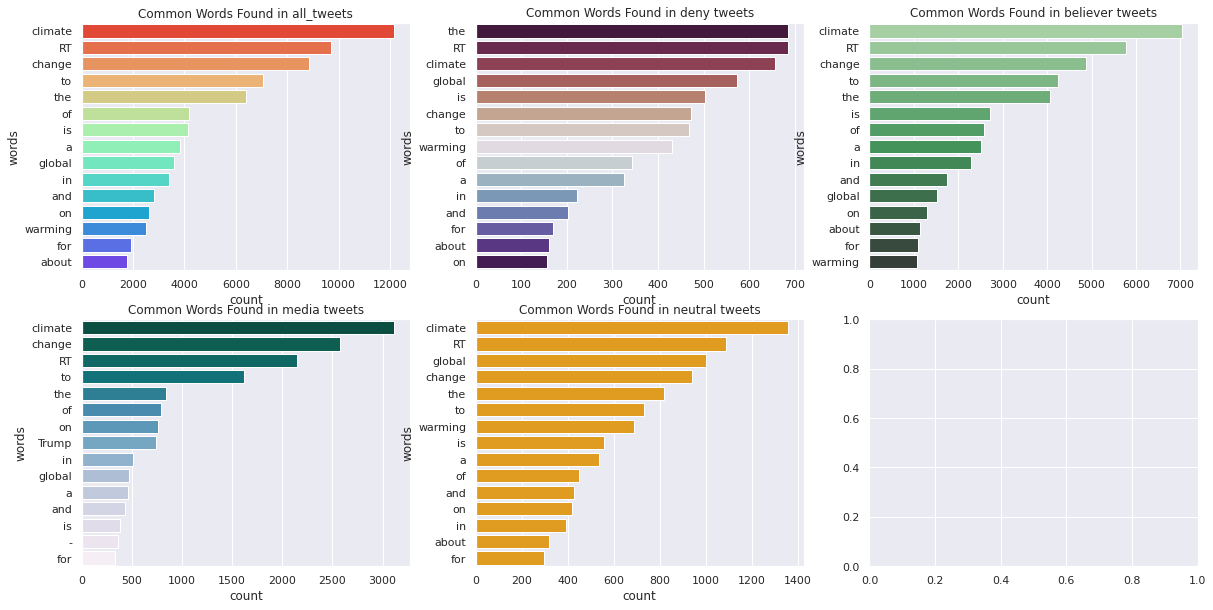

In [17]:
sns.set(font_scale=1)
fig, axes = plt.subplots(2,3, figsize=(20, 10), squeeze=False)

sns.barplot(y='words' ,x=tweet_word_counts_all['count'], 
            data = tweet_word_counts_all.sort_values(by='count', ascending=False), ax=axes[0,0], 
            palette = "rainbow_r", orient = 'h')
axes[0,0].set_title("Common Words Found in all_tweets")

sns.barplot(y='words' ,x=tweet_word_counts_deny['count'], data = tweet_word_counts_deny.sort_values(by='count', ascending=False),ax=axes[0,1], palette = "twilight_shifted_r", orient = 'h')
axes[0,1].set_title("Common Words Found in deny tweets")

sns.barplot(y='words' ,x=tweet_word_counts_pro['count'], data = tweet_word_counts_pro.sort_values(by='count', ascending=False),ax=axes[0,2], palette = "Greens_d", orient = 'h')
axes[0,2].set_title("Common Words Found in believer tweets")

sns.barplot(y='words' ,x=tweet_word_counts_media['count'], data = tweet_word_counts_media.sort_values(by='count', ascending=False),ax=axes[1,0], palette = "PuBuGn_r", orient = 'h')
axes[1,0].set_title("Common Words Found in media tweets")

sns.barplot(y='words' ,x=tweet_word_counts_neutral['count'], data = tweet_word_counts_neutral.sort_values(by='count', ascending=False),ax=axes[1,1], color = 'orange', orient = 'h')
axes[1,1].set_title("Common Words Found in neutral tweets")

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section undergo the following: clean the dataset and make manipultions to the 'message' column. It should be noted that further EDA will take place in this section once the data is clean. |

---

In [39]:
def remove_pattern(input_text, patterns):
    helper = re.findall(patterns, input_text)
    for i in helper:
        input_text = re.sub(i, '', input_text)
    return input_text

 #Remove Twitter handles from the train and test data 
#df_train['clean_tweet'] = np.vectorize(remove_pattern)(df_train['clean_tweet'], "@[\w]*")
#df_test['clean_tweet'] = np.vectorize(remove_pattern)(df_test['clean_tweet'], "@[\w]*")

In [20]:
# Cleaning links
df_train["clean_tweet"] = df_train['message'].str.replace(r'https://\S+', "")
df_test["clean_tweet"] = df_test['message'].str.replace(r'https://\S+', "")

In [21]:
#pd.set_option('display.max_colwidth', -1)
#df_train.head()

In [22]:
# Remove punctuations, numbers, and special characters
df_train['clean_tweet'] = df_train['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df_test['clean_tweet'] = df_test['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

In [23]:
# Remove all words below 2 characters
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df_test['clean_tweet'] = df_test['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


In [24]:
pd.set_option('display.max_colwidth', -1)
df_train.head()

,sentiment,message,tweetid,clean_tweet
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,PolySciMajor EPA chief doesn think carbon dioxide main cause global warming and wait what via mashable
1,1,It's not like we lack evidence of anthropogenic global warming,126103,not like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RawStory Researchers say have three years act climate change before too late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED was pivotal year the war climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,SoyNovioDeTodas and racist sexist climate change denying bigot leading the polls #ElectionNight


In [25]:
# More cleaning
wordnet_lemmatizer = WordNetLemmatizer()
def cleandata(message):

    # Translate emojis if we have
    message = emoji.demojize(message, delimiters=("", "")) 

    # lowercase
    message = message.lower() 
    
    # Removing stopwords
    message = message.split(' ')
    message = ' '.join([word for word in message if word not in stop_words])
    
    # lemmatisation and tokenization
    lemmatizer = WordNetLemmatizer()
    message = [lemmatizer.lemmatize(token) for token in message.split(' ')]
    message = [lemmatizer.lemmatize(token, 'v') for token in message]
    message = ' '.join(message)

    return message

In [26]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
df_train['clean_tweet'] = df_train.clean_tweet.apply(cleandata)
df_test['clean_tweet'] = df_test.clean_tweet.apply(cleandata)
df_train.head()

,sentiment,message,tweetid,clean_tweet
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief think carbon dioxide main cause global warm wait via mashable
1,1,It's not like we lack evidence of anthropogenic global warming,126103,like lack evidence anthropogenic global warm
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rawstory researcher say three year act climate change late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#todayinmaker# wire pivotal year war climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,soynoviodetodas racist sexist climate change deny bigot lead poll #electionnight


In [27]:
df_test.head()

,message,tweetid,clean_tweet
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760,europe look china make sure alone fight climate change
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326,combine poll staffer climate change woman right fascist state
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985,scary unimpeachable evidence climate change already #itstimetochange #climatechange zeroco
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263,karoli morgfair osborneink dailykos putin get jill trump believe climate change think hoax
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,fakewillmoore female orgasm cause global warm sarcastic republican


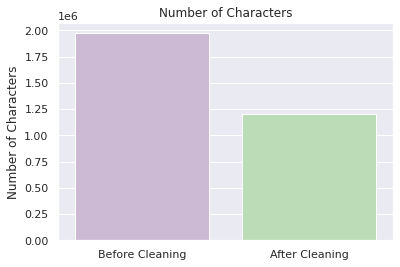

In [28]:
# Combining all the messages
text_before_cleaning = " ".join(tweet for tweet in df_train['message'])
text_after_cleaning = " ".join(tweet for tweet in df_train['clean_tweet'])

# Numbers of characters before and after cleaning for both 
sns.barplot(x=['Before Cleaning', 'After Cleaning'], y=[len(text_before_cleaning), len(text_after_cleaning)], palette='PRGn')
# sns.countplot(x=[] ,data = working_df, palette='PRGn')
plt.ylabel('Number of Characters')
# plt.xlabel('Sentiment')
plt.title('Number of Characters')
plt.show()

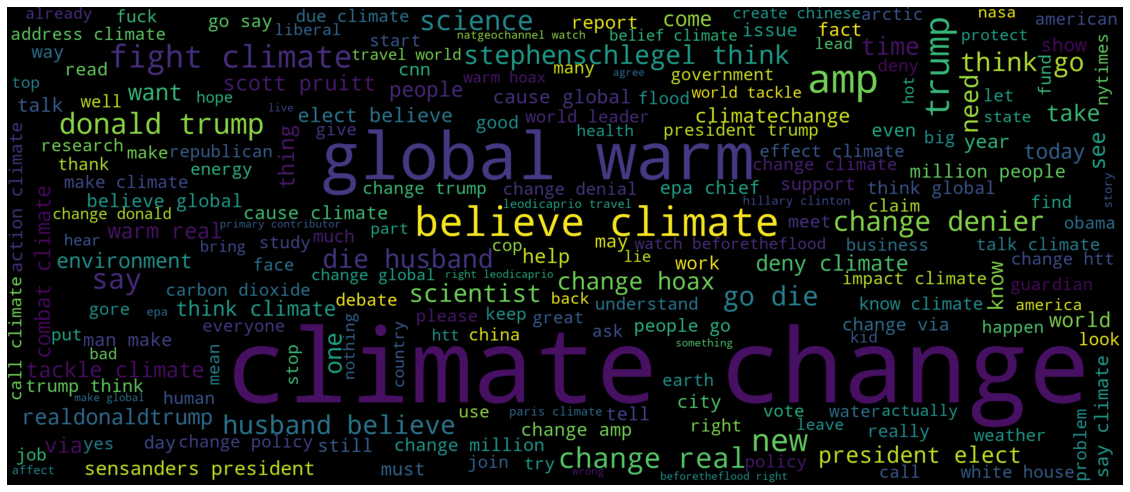

In [40]:
#Most frequent words in the train set
from wordcloud import WordCloud
#Removing most common words in all sentiments from word clouds to see the different words used
stop_words.extend(['climate', 'change', 'global','warm', 'warming', 'url', 'web', 'ÂÂ', 'Â', 'Â Â', 'rt', 'â', 'ââ' ,'â â'])

words_train=" ".join([tweet for tweet in df_train['clean_tweet']])
wordcloud = WordCloud(background_color='black',width=2800, height=1200,random_state=26).generate(words_train)

# Displaying the word cloud image:
# using matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


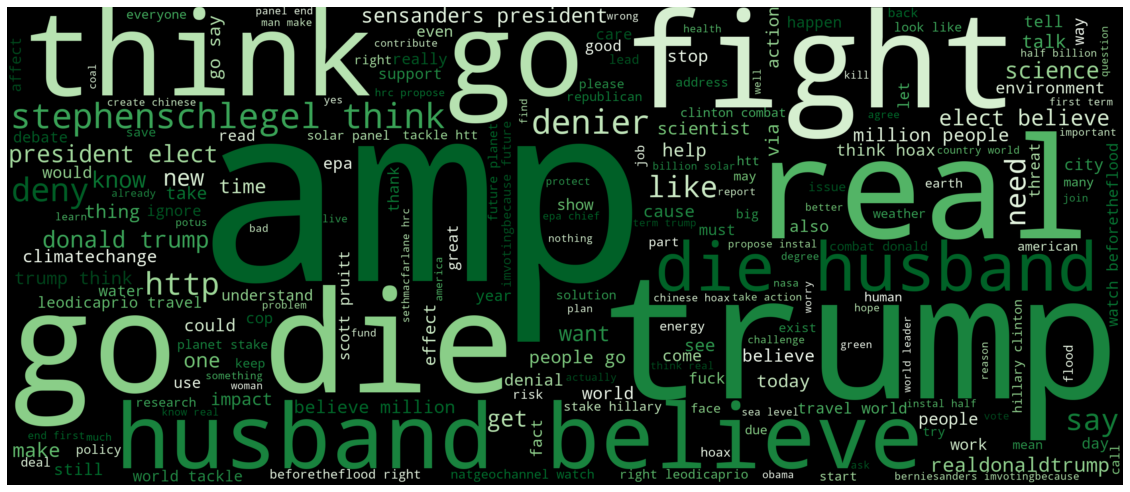

In [30]:
#Most positive frequent words 
positive=" ".join([tweet for tweet in df_train['clean_tweet'][df_train['sentiment']==1]])
wordcloud = WordCloud(stopwords=stop_words,colormap="Greens_r",background_color='black',width=2800, height=1200,random_state=42).generate(positive)

# Displaying the word cloud image:
# using matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

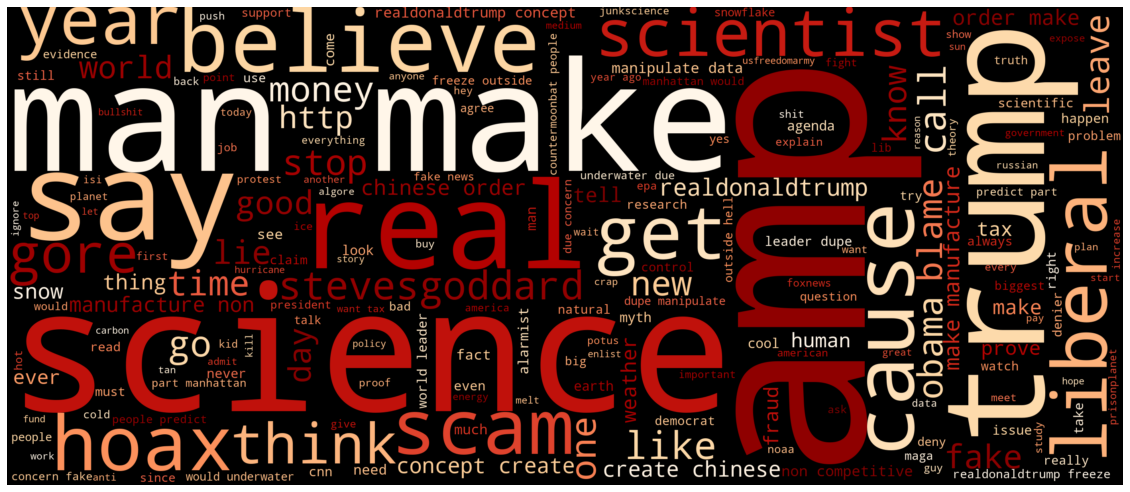

In [31]:
#Most negative frequent words 
negative=" ".join([tweet for tweet in df_train['clean_tweet'][df_train['sentiment']==-1]])
wordcloud = WordCloud(stopwords=stop_words,colormap="OrRd_r",background_color='black',width=2800, height=1200,random_state=26).generate(negative)

# Displaying the word cloud image:
# using matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

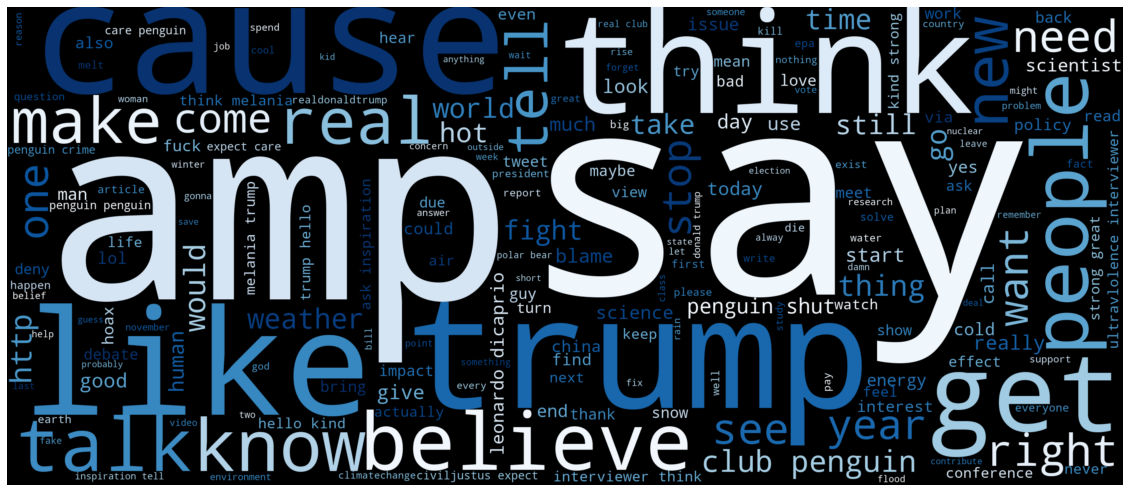

In [32]:
#Most neutral frequent words 
neutral=" ".join([tweet for tweet in df_train['clean_tweet'][df_train['sentiment']==0]])
wordcloud = WordCloud(stopwords=stop_words,colormap="Blues",background_color='black',width=2800, height=1200,random_state=26).generate(neutral)

# Displaying the word cloud image:
# using matplotlib way:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

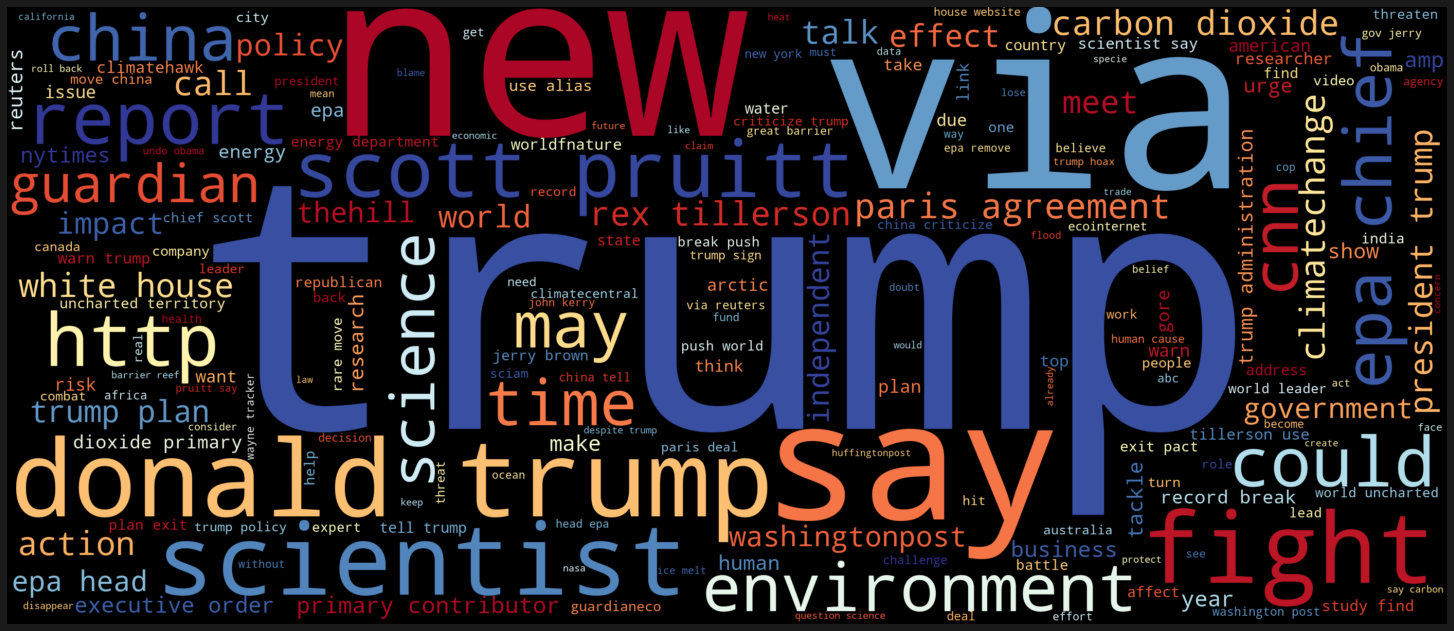

In [33]:
#Most news frequent words 
new=" ".join([tweet for tweet in df_train['clean_tweet'][df_train['sentiment']==2]])
wordcloud = WordCloud(stopwords=stop_words,colormap="RdYlBu_r",background_color='black',width=2800, height=1200,random_state=26).generate(new)

# Displaying the word cloud image:
# using matplotlib way:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [34]:
df_copy1 = df_train.copy()
# Labeling the target
df_copy1['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in df_copy1['sentiment']]

In [35]:
df_copy1.head()

,sentiment,message,tweetid,clean_tweet
0,Positive,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief think carbon dioxide main cause global warm wait via mashable
1,Positive,It's not like we lack evidence of anthropogenic global warming,126103,like lack evidence anthropogenic global warm
2,News,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rawstory researcher say three year act climate change late
3,Positive,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#todayinmaker# wire pivotal year war climate change
4,Positive,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,soynoviodetodas racist sexist climate change deny bigot lead poll #electionnight


In [36]:
def feature_count(argu2):
    sentiment_df1 = df_copy1[df_copy1['clean_tweet'].str.contains(argu2)]
    sentiment_df1 = (sentiment_df1.groupby('sentiment').count()/df.groupby('sentiment').count())*100
    sentiment_df1['percentage'] = sentiment_df1['clean_tweet']
    sentiment_df1 = sentiment_df1[['percentage']]
    
    return sentiment_df1
grouped1 = df_copy1.groupby(df_copy1.sentiment)
deny_df1 =grouped1.get_group('Negative')
pro_df1 = grouped1.get_group('Positive')
media_df1 = grouped1.get_group('News')
neutral_df1 = grouped1.get_group('Neutral')

import itertools
import collections
# Create a list of lists containing lowercase words for each tweet
words_in_all_tweet1 = [tweet.split() for tweet in df_copy1['clean_tweet']]
deny_tweets_list1 = [deny_tweet.split() for deny_tweet in deny_df1['clean_tweet']]
pro_tweets_list1 = [pro_tweet.split() for pro_tweet in pro_df1['clean_tweet']]
media_tweets_list1 = [media_tweet.split() for media_tweet in media_df1['clean_tweet']]
neutral_tweets_list1 = [neutral_tweet.split() for neutral_tweet in neutral_df1['clean_tweet']]


# List of all words across tweets
clean_message_all_list1= list(itertools.chain(*words_in_all_tweet1))
clean_message_list_deny1= list(itertools.chain(*deny_tweets_list1))
clean_message_list_pro1= list(itertools.chain(*pro_tweets_list1))
clean_message_list_meida1= list(itertools.chain(*media_tweets_list1))
clean_message_list_neutral1= list(itertools.chain(*neutral_tweets_list1))

# Create counter
counts_clean_message_all1 = collections.Counter(clean_message_all_list1)
counts_clean_message_deny1 = collections.Counter(clean_message_list_deny1)
counts_clean_message_pro1 = collections.Counter(clean_message_list_pro1)
counts_clean_message_media1= collections.Counter(clean_message_list_meida1)
counts_clean_message_neutral1 = collections.Counter(clean_message_list_neutral1)

common_words_number = 15
counts_clean_message_all1.most_common(common_words_number)
counts_clean_message_deny1.most_common(common_words_number)
counts_clean_message_pro1.most_common(common_words_number)
counts_clean_message_media1.most_common(common_words_number)
counts_clean_message_neutral1.most_common(common_words_number)

#Build a Dataframe of the words in the tweets as well as their count
tweet_word_counts_all1 = pd.DataFrame(counts_clean_message_all1.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_deny1 = pd.DataFrame(counts_clean_message_deny1.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_pro1 = pd.DataFrame(counts_clean_message_pro1.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_media1 = pd.DataFrame(counts_clean_message_media1.most_common(common_words_number),
                             columns=['words', 'count'])
tweet_word_counts_neutral1 = pd.DataFrame(counts_clean_message_neutral1.most_common(common_words_number),
                             columns=['words', 'count'])

Text(0.5, 1.0, 'Common Words Found in neutral tweets after data cleaning')

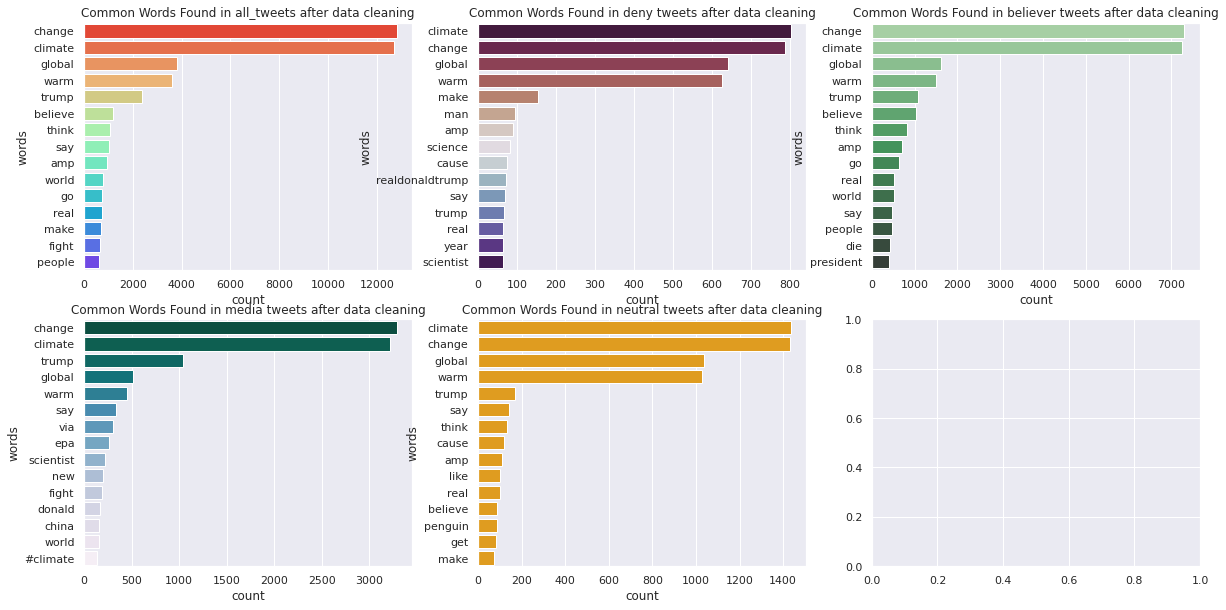

In [37]:
sns.set(font_scale=1)
fig, axes = plt.subplots(2,3, figsize=(20, 10), squeeze=False)

sns.barplot(y='words' ,x=tweet_word_counts_all1['count'], data = tweet_word_counts_all1.sort_values(by='count', ascending=False),ax=axes[0,0], palette = "rainbow_r", orient = 'h')
axes[0,0].set_title("Common Words Found in all_tweets after data cleaning")

sns.barplot(y='words' ,x=tweet_word_counts_deny1['count'], data = tweet_word_counts_deny1.sort_values(by='count', ascending=False),ax=axes[0,1], palette = "twilight_shifted_r", orient = 'h')
axes[0,1].set_title("Common Words Found in deny tweets after data cleaning")

sns.barplot(y='words' ,x=tweet_word_counts_pro1['count'], data = tweet_word_counts_pro1.sort_values(by='count', ascending=False),ax=axes[0,2], palette = "Greens_d", orient = 'h')
axes[0,2].set_title("Common Words Found in believer tweets after data cleaning")

sns.barplot(y='words' ,x=tweet_word_counts_media1['count'], data = tweet_word_counts_media1.sort_values(by='count', ascending=False),ax=axes[1,0], palette = "PuBuGn_r", orient = 'h')
axes[1,0].set_title("Common Words Found in media tweets after data cleaning")

sns.barplot(y='words' ,x=tweet_word_counts_neutral1['count'], data = tweet_word_counts_neutral1.sort_values(by='count', ascending=False),ax=axes[1,1], color = 'orange', orient = 'h')
axes[1,1].set_title("Common Words Found in neutral tweets after data cleaning")

In [38]:
# Split data 
X = df_train['clean_tweet']
y = df_train['sentiment']

X_real = df_test['clean_tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=32,  shuffle = True, stratify=y)


<a id="five"></a>
## 5. Modelling and Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we create multiple models that are able to classify the tweets. We then also test out the Model Performance of each model.|

---

In [48]:

#Using a pipeline to train the model
#LinearSVC
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', LinearSVC())])
pipe.fit(X_train, y_train)
y_pred_lsvc = pipe.predict(X_test)
print('model: Linear SVC Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))
print("F1 Score:",f1_score(y_test, y_pred_lsvc,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_lsvc))
print('---------------------------------------------------------')

#LogisticRegression
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', LogisticRegression())])
pipe.fit(X_train, y_train)
y_pred_lr = pipe.predict(X_test)
print('model: LogisticRegression Metrics')
print(metrics.classification_report(y_test, y_pred_lr))
print("F1 Score:",f1_score(y_test, y_pred_lsvc,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_lr))
print('---------------------------------------------------------')

#KNeighborsClassifier
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', KNeighborsClassifier())])
pipe.fit(X_train, y_train)
y_pred_kn = pipe.predict(X_test)
print('model: LKNeighbours Metrics')
print(metrics.classification_report(y_test, y_pred_kn))
print("F1 Score:",f1_score(y_test,y_pred_kn,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_kn))
print('---------------------------------------------------------')

#SVC-linearKernel
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', SVC(kernel='linear'))])
pipe.fit(X_train, y_train)
y_pred_lksvc = pipe.predict(X_test)
print('model: SVC linearKernel Metrics')
print(metrics.classification_report(y_test, y_pred_lksvc))
print("F1 Score:",f1_score(y_test, y_pred_lksvc,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_lksvc))
print('---------------------------------------------------------')

#SVC-RadialKernel
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', SVC(kernel='rbf'))])
pipe.fit(X_train, y_train)
y_pred_rksvc = pipe.predict(X_test)
print('model: SVC RadialKernel Metrics')
print(metrics.classification_report(y_test, y_pred_rksvc))
print("F1 Score:",f1_score(y_test, y_pred_rksvc,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_rksvc))
print('---------------------------------------------------------')

# GradientBoostingClassifier
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', GradientBoostingClassifier())])
pipe.fit(X_train, y_train)
y_pred_gb = pipe.predict(X_test)
print('model: GradientBoost Metrics')
print(metrics.classification_report(y_test, y_pred_gb))
print("F1 Score:",f1_score(y_test, y_pred_gb,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_gb))
print('---------------------------------------------------------')

#AdaBoostClassifier
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', AdaBoostClassifier())])
pipe.fit(X_train, y_train)
y_pred_ab = pipe.predict(X_test)
print('model: AdaBoost Metrics')
print(metrics.classification_report(y_test, y_pred_ab))
print("F1 Score:",f1_score(y_test, y_pred_ab,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_ab))
print('---------------------------------------------------------')

# DecisionTreeClassifier
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)
y_pred_dt = pipe.predict(X_test)
print('model: DecisionTree Metrics')
print(metrics.classification_report(y_test, y_pred_dt))
print("F1 Score:",f1_score(y_test, y_pred_dt,average='weighted'))
print(metrics.confusion_matrix(y_test, y_pred_dt))
print('---------------------------------------------------------')

#RandomForest
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', RandomForestClassifier())])
pipe.fit(X_train, y_train)
y_pred_rf = pipe.predict(X_test)
print('model: RandomForest Metrics')
print(metrics.classification_report(y_test, y_pred_rf))
print("F1 Score:",f1_score(y_test, y_pred_rf,average='weighted'))
print(metrics.confusion_matrix(y_test, y_pred_rf))
print('---------------------------------------------------------')

#MultinomialNB
pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9, ngram_range=(1, 2))),
                ('classification', MultinomialNB())])
pipe.fit(X_train, y_train)
y_pred_mnb = pipe.predict(X_test)
print('model: MNB Metrics')
print(metrics.classification_report(y_test, y_pred_mnb))
print("F1 Score:",f1_score(y_test, y_pred_mnb,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_mnb))

model: Linear SVC Metrics
              precision    recall  f1-score   support

          -1       0.76      0.60      0.67        65
           0       0.69      0.42      0.52       118
           1       0.75      0.85      0.80       426
           2       0.72      0.74      0.73       182

    accuracy                           0.74       791
   macro avg       0.73      0.65      0.68       791
weighted avg       0.74      0.74      0.73       791

F1 Score: 0.7315741444323497
[[ 39   7  18   1]
 [  5  49  57   7]
 [  6  13 363  44]
 [  1   2  44 135]]
---------------------------------------------------------
model: LogisticRegression Metrics
              precision    recall  f1-score   support

          -1       0.88      0.45      0.59        65
           0       0.61      0.35      0.44       118
           1       0.72      0.88      0.79       426
           2       0.75      0.68      0.71       182

    accuracy                           0.72       791
   macro avg   

In [42]:
# StackingClassifier
level0 = list()
level0.append(('mnb', MultinomialNB()))
level0.append(('mnb0.001', MultinomialNB(alpha = 0.001)))
level0.append(('lr', LogisticRegression(n_jobs=-1)))
level0.append(('lr2', LogisticRegression(C = 100, max_iter=5000, n_jobs=-1)))
level0.append(('svc', SVC(kernel='linear')))
#Model1(definening meta model and define stacking ensemble)
level1 = LinearSVC()
model = StackingClassifier(estimators=level0, final_estimator=level1)
pipe = Pipeline([ ('tfidf', TfidfVectorizer(ngram_range=(1, 2),token_pattern=r'\b\w\w+\b|(?<!\w)@\w+|(?<!\w)#\w+')),
                 ('clf', model)
                ], verbose = 10)
pipe.fit(X_train, y_train)

#Predict and evaluate
y_pred_lsvc = pipe.predict(X_test)

print('model: Linear SVC Metrics')
print(metrics.classification_report(y_test, y_pred_lsvc))
print("F1 Score:",f1_score(y_test, y_pred_lsvc,average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_lsvc))

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   0.7s
[Pipeline] ............... (step 2 of 2) Processing clf, total= 7.6min
model: Linear SVC Metrics
              precision    recall  f1-score   support

          -1       0.77      0.66      0.71        65
           0       0.70      0.41      0.51       118
           1       0.75      0.86      0.80       426
           2       0.76      0.74      0.75       182

    accuracy                           0.75       791
   macro avg       0.74      0.67      0.69       791
weighted avg       0.75      0.75      0.74       791

F1 Score: 0.7400597441170658


Models accuracry is not the best metrice to evaluate the performance of the models,hence we looked at other evaluation metrices to coclude on which model performs better ,those metrice are:
1. Confusion Matrix: table shows correct predictions and types of incorrect predictions
2. Precision: the number of true positives divided by all positive predictions.
3. Recall: the number of true positives divided by the number of positive values in the test data.
4. F1: Score: the weighted average of precision and recall.


In [49]:
#testing model
y_pred_lr_real = pipe.predict(X_real)

df_test['sentiment'] = y_pred_lr_real

In [50]:
df_test[['tweetid','sentiment']].to_csv('Team_8.csv', index=False)

In [51]:
df_test.head(50)

,message,tweetid,clean_tweet,sentiment
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760,europe look china make sure alone fight climate change,1
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326,combine poll staffer climate change woman right fascist state,1
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985,scary unimpeachable evidence climate change already #itstimetochange #climatechange zeroco,1
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263,karoli morgfair osborneink dailykos putin get jill trump believe climate change think hoax,1
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928,fakewillmoore female orgasm cause global warm sarcastic republican,1
5,RT @nycjim: Trump muzzles employees of several gov’t agencies in effort to suppress info on #climate change &amp; the environment. https://t.co…,75639,nycjim trump muzzle employee several gov agency effort suppress info #climate change amp environment,1
6,@bmastenbrook yes wrote that in 3rd yr Comp Sci ethics part. Was told by climate change denying Lecturer that I was wrong &amp; marked down.,211536,bmastenbrook yes write comp sci ethic part tell climate change deny lecturer wrong amp mark,1
7,RT @climatehawk1: Indonesian farmers weather #climate change w/ conservation agriculture | @IPSNews https://t.co/1NZUCCMlYr…,569434,climatehawk indonesian farmer weather #climate change conservation agriculture ipsnews,1
8,RT @guardian: British scientists face a ‘huge hit’ if the US cuts climate change research https://t.co/KlKQnYDXzh,315368,guardian british scientist face huge hit cut climate change research,1
9,Aid For Agriculture | Sustainable agriculture and climate change adaptation for small-scale farmers https://t.co/q7IPCP59x9 via @aid4ag,591733,aid agriculture sustainable agriculture climate change adaptation small scale farmer via aid,1


<a id="seven"></a>
## 6. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic